 **Step 1: Upload Your CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 2012_marvels_the_avengers_critic.csv to 2012_marvels_the_avengers_critic.csv


**Step 2: Load and Inspect the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("2012_marvels_the_avengers_critic.csv")
df.head()


,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,reviewId,originalScore,scoreSentiment
0,2012-04-19,Matthew Pejkovic,/critics/matthew-pejkovic,fresh,True,False,False,False,/critics/source/510,Matt's Movie Reviews,http://www.mattsmoviereviews.net/movie-critic-...,An action spectacular with a witty script to m...,2074400,4.5/5,POSITIVE
1,2012-04-19,Andrew L. Urban,/critics/andrew-l-urban,fresh,True,False,False,False,/critics/source/462,Urban Cinefile,http://www.urbancinefile.com.au/home/view.asp?...,...doesn't have the emotional involvement of t...,2074665,NaN,POSITIVE
2,2012-04-19,Louise Keller,/critics/louise-keller,fresh,True,False,False,False,/critics/source/462,Urban Cinefile,http://www.urbancinefile.com.au/home/view.asp?...,Lovers of the genre will be hard pressed to na...,2074664,NaN,POSITIVE
3,2012-04-19,Chris Laverty,/critics/chris-laverty,fresh,True,False,False,False,/critics/source/2235,Clothes on Film,http://clothesonfilm.com/review-avengers-assem...,"A witty, well-acted sci-fi adventure.",2074651,NaN,POSITIVE
4,2012-04-19,Simon Miraudo,/critics/simon-miraudo,fresh,True,False,False,False,/critics/source/2378,Quickflix,https://streaming.quickflix.com.au/News/Review...,A continued run of quality can't be guaranteed...,2074481,4.5/5,POSITIVE


**Step 3: Preprocess the Text (Lowercase, Remove Punctuation, Stopwords)**

In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['cleaned_quote'] = df['quote'].apply(preprocess)
df[['quote', 'cleaned_quote']].head()


,quote,cleaned_quote
0,An action spectacular with a witty script to m...,action spectacular witty script match big visu...
1,...doesn't have the emotional involvement of t...,doesnt emotional involvement best scifi action...
2,Lovers of the genre will be hard pressed to na...,lovers genre hard pressed favourite superhero ...
3,"A witty, well-acted sci-fi adventure.",witty wellacted scifi adventure
4,A continued run of quality can't be guaranteed...,continued run quality guaranteed involved aven...


**Step 4: Convert Text to TF-IDF Vectors**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']


**Step 5: Train/Test Split and Naive Bayes Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

**tep 6: Make Predictions and Show Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 90.54%


**Step 7: Display Confusion Matrix**

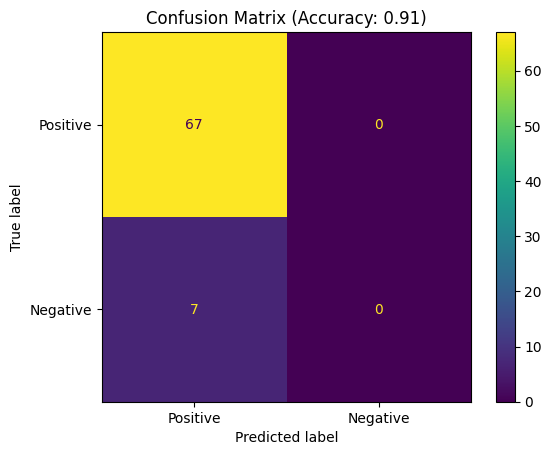

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["POSITIVE", "NEGATIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


**OPTION A: Traditional ML (TF-IDF + Naive Bayes)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))


Naive Bayes Accuracy: 0.9054054054054054


**OPTION B: Deep Learning (GloVe + Neural Net)**

 Section 3B: Tokenize and Prepare GloVe

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

df['label'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_quote'])

sequences = tokenizer.texts_to_sequences(df['cleaned_quote'])
padded = pad_sequences(sequences, maxlen=100, padding='post')

X = padded
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Section 4B: Load GloVe and Create Embedding Matrix

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((10000, 100))
word_index = tokenizer.word_index
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


--2025-05-02 02:58:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-02 02:58:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-02 02:58:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov